In [1]:
#Real Estate Price - Machine Learning Regression Project
#By Christopher Shih

#Dataset provided by Kaggle.com, as part of the "Advanced Regression Techniques" competition.
#This data contains historical real estate data from Ames, Iowa. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
#Part 1
#Exploratory data visualizations

163000.0


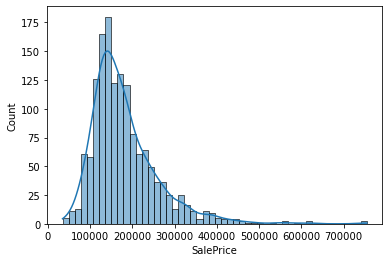

In [7]:
sns.histplot(train['SalePrice'],kde=True,bins=50)
print(train['SalePrice'].median())

<AxesSubplot:ylabel='Count'>

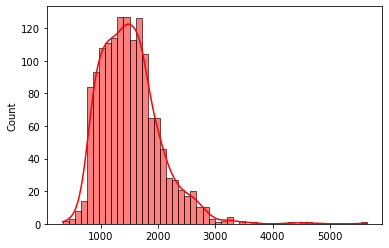

In [8]:
#total 
sns.histplot(train['1stFlrSF'] + train['2ndFlrSF'],kde=True,bins=50,color='red')

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='count'>

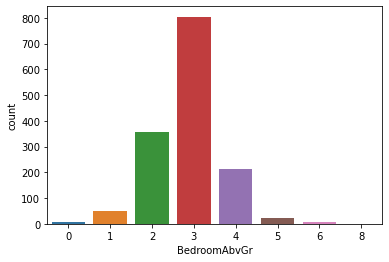

In [9]:
sns.countplot(x='BedroomAbvGr',data=train)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

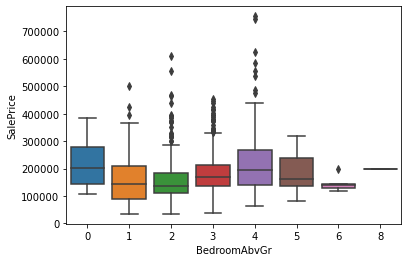

In [10]:
sns.boxplot(x='BedroomAbvGr',y='SalePrice',data=train)

<AxesSubplot:xlabel='Neighborhood'>

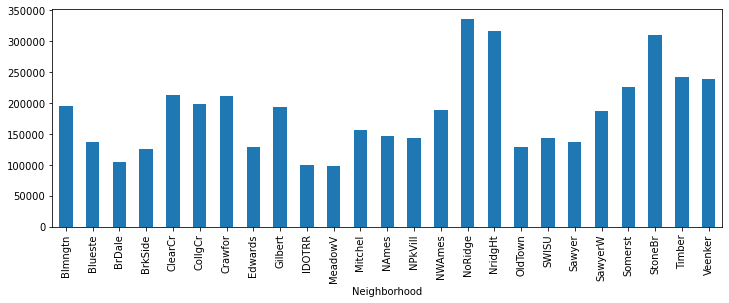

In [11]:
#find which neighborhoods are most desirable
nh_prices = train.groupby('Neighborhood').mean()
plt.figure(figsize=(12,4))
nh_prices['SalePrice'].plot(kind='bar')

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

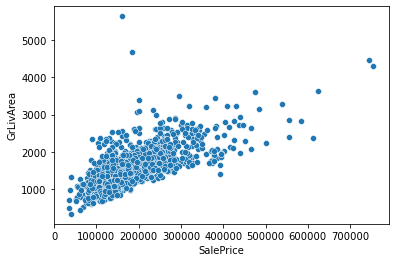

In [12]:
sns.scatterplot(x='SalePrice',y='GrLivArea',data=train)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

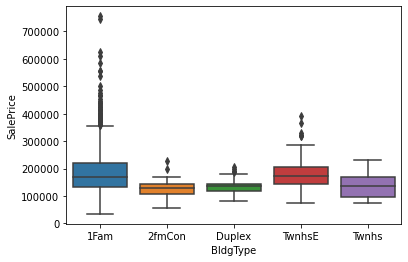

In [13]:
sns.boxplot(x='BldgType',y='SalePrice',data=train)

<AxesSubplot:>

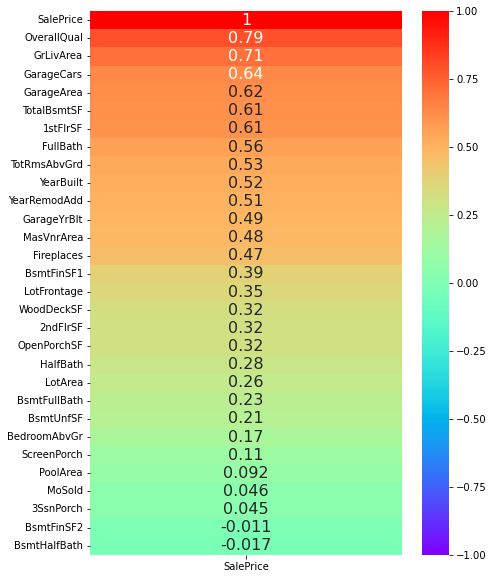

In [14]:
top_corr = train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(7,10))
sns.heatmap(top_corr,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

<AxesSubplot:xlabel='YrSold'>

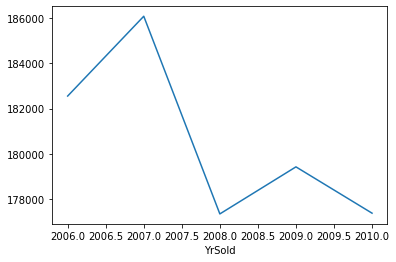

In [15]:
#2008 housing crash can be seen
train.groupby('YrSold').mean()['SalePrice'].plot()

<AxesSubplot:xlabel='MSSubClass'>

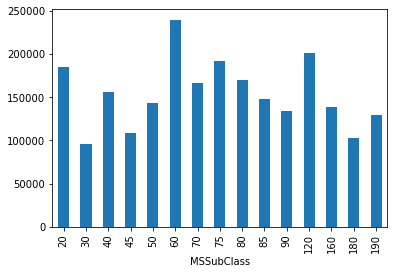

In [16]:
train.groupby('MSSubClass').mean()['SalePrice'].plot(kind='bar')

<AxesSubplot:xlabel='MSZoning'>

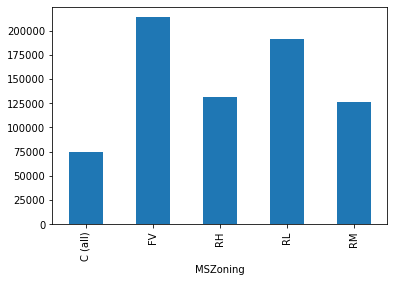

In [17]:
train.groupby('MSZoning').mean()['SalePrice'].plot(kind='bar')

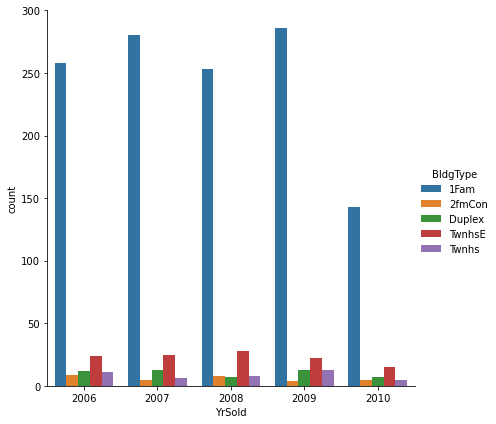

In [18]:
#ames, iowa seems to be a more rural town
sns.catplot(x="YrSold", data=train, kind='count', hue='BldgType', height=6)

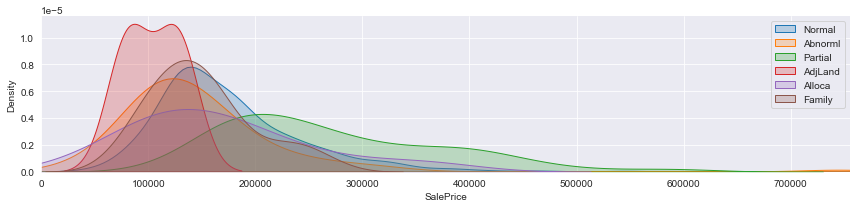

In [19]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(data=train,hue='SaleCondition',aspect=4)
fig.map(sns.kdeplot,'SalePrice',shade=True)
max_val = train['SalePrice'].max()
fig.set(xlim=(0,max_val))
plt.legend()

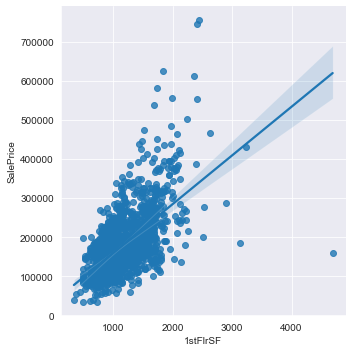

In [20]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

<AxesSubplot:xlabel='SaleType'>

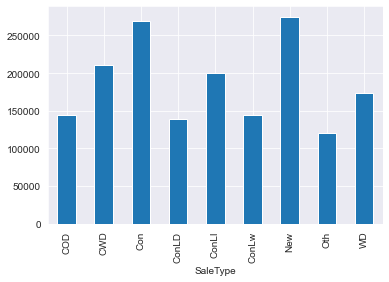

In [21]:
train.groupby('SaleType').mean()['SalePrice'].plot(kind='bar')

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

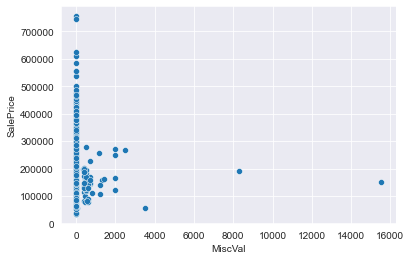

In [22]:
sns.scatterplot(x='MiscVal',y='SalePrice',data=train)

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

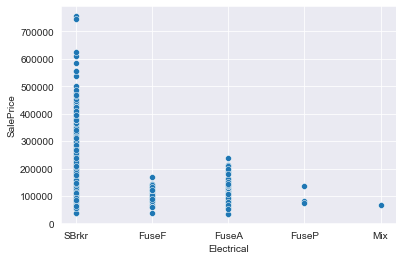

In [23]:
sns.scatterplot(x='Electrical',y='SalePrice',data=train)

In [24]:
#Part 2
#Data preprocessing

In [25]:
#remove price outliers
train['SalePrice'].sort_values(ascending=False).head(10)

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64

In [26]:
train = train[train['SalePrice'] < 500000]

In [27]:
#remove square footage outliers
(train['1stFlrSF'] + train['2ndFlrSF']).sort_values(ascending=False).head(10)

1298    5642
523     4676
304     3493
1268    3447
1353    3238
496     3228
118     3222
608     3194
798     3140
185     3036
dtype: int64

In [28]:
train = train[(train['1stFlrSF'] + train['2ndFlrSF']) < 3200]

In [29]:
train.shape, test.shape

((1444, 81), (1459, 80))

In [30]:
#combining both train and test to process together
sale_prices = train['SalePrice']
combined_df = pd.concat([train,test],axis=0).reset_index(drop=True)
combined_df.drop(['SalePrice'],axis=1,inplace=True)
combined_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2899,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2900,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2901,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [31]:
#fill or remove null columns
combined_df.isnull().sum()[combined_df.isnull().sum() > 0]

MSZoning           4
LotFrontage      484
Alley           2705
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2895
Fence           2334
MiscFeature     2798
SaleType           1
dtype: int64

In [32]:
combined_df['GarageType'].fillna("None",inplace=True)

In [33]:
#redundant/unnecessary columns
combined_df.drop(['BsmtQual','GarageArea','GarageQual','GarageFinish','GarageYrBlt','GarageCond'],axis=1,inplace=True)

In [34]:
combined_df['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [35]:
#too few miscellaneous features to make a difference
combined_df.drop(['MiscFeature','MiscVal'],axis=1,inplace=True)

In [36]:
#these columns are mostly null values
combined_df.drop(['Alley','FireplaceQu','PoolQC'],axis=1,inplace=True)

In [37]:
combined_df['Fence'].fillna("None",inplace=True)

In [38]:
combined_df.isnull().sum()[combined_df.isnull().sum() > 0]

MSZoning          4
LotFrontage     484
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageCars        1
SaleType          1
dtype: int64

In [39]:
for i in ('LotFrontage','MasVnrArea','GarageCars','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'): 
    combined_df[i].fillna(0,inplace=True)
for i in ('BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType'):
    combined_df[i].fillna("None",inplace=True)
    
combined_df['Electrical'].fillna("Mix",inplace=True)
combined_df['MSZoning'].fillna("RL",inplace=True)
combined_df['Exterior1st'].fillna("Other",inplace=True)
combined_df['Exterior2nd'].fillna("Other",inplace=True)
combined_df['KitchenQual'].fillna("TA",inplace=True)
combined_df['Functional'].fillna("Typ",inplace=True)
combined_df['SaleType'].fillna("WD",inplace=True)

In [40]:
combined_df['SaleType'].value_counts()

WD       2516
New       233
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [41]:
#electrical column doesnt tell us much
combined_df.drop('Electrical',axis=1,inplace=True)

In [42]:
#each number is a code for a type of dwelling (e.g. duplex, 2 story, etc.)
combined_df['MSSubClass'].value_counts()

20     1075
60      566
50      285
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       22
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [43]:
#bldgtype and housestyle are very similar to mssubclass, drop these columns
combined_df.drop(['HouseStyle','BldgType'],axis=1,inplace=True)

In [44]:
print(combined_df['Street'].value_counts())

#not enough data for gravel streets, remove the column
combined_df.drop('Street',axis=1,inplace=True)

Pave    2891
Grvl      12
Name: Street, dtype: int64


In [45]:
print(combined_df['Utilities'].value_counts())
combined_df.drop('Utilities',axis=1,inplace=True)

AllPub    2900
NoSeWa       1
Name: Utilities, dtype: int64


In [46]:
#lotshape, landslope and landcontour are very similar
combined_df.drop(['LotShape','LandSlope'],axis=1,inplace=True)

In [47]:
combined_df['SaleCondition'].value_counts()

Normal     2393
Partial     239
Abnorml     189
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [48]:
combined_df['Functional'].value_counts()

Typ     2704
Min2      70
Min1      65
Mod       34
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [49]:
print(train[train['Functional'] == "Sev"]['SalePrice'])

666    129000
Name: SalePrice, dtype: int64


In [50]:
combined_df[['1stFlrSF','2ndFlrSF','GrLivArea']]

,1stFlrSF,2ndFlrSF,GrLivArea
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198
...,...,...,...
2898,546,546,1092
2899,546,546,1092
2900,1224,0,1224
2901,970,0,970


In [51]:
#we can just use total square footage
combined_df.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

In [52]:
combined_df['BsmtFinType2'].value_counts()

Unf     2478
Rec      105
LwQ       87
None      80
BLQ       68
ALQ       51
GLQ       34
Name: BsmtFinType2, dtype: int64

In [53]:
#these 2 columns are redundant - BsmtUnfSF already describes square footage of unfinished area 
combined_df.drop(['BsmtFinSF1','BsmtFinSF2'],axis=1,inplace=True)

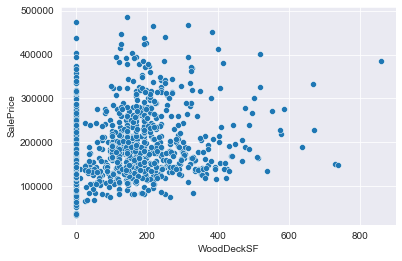

In [54]:
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=train)

#no clear correlation, delete deck feature
combined_df.drop('WoodDeckSF',axis=1,inplace=True)

In [55]:
combined_df['SaleCondition'].value_counts()

Normal     2393
Partial     239
Abnorml     189
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [56]:
combined_df['SaleType'].value_counts()

WD       2516
New       233
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [57]:
#final check for null values
combined_df.isnull().sum()[combined_df.isnull().sum() > 0]

Series([], dtype: int64)

In [58]:
#Part 3
#Feature engineering

In [59]:
combined_df['Exterior1st'].value_counts()

VinylSd    1020
MetalSd     450
HdBoard     440
Wd Sdng     410
Plywood     220
CemntBd     122
BrkFace      86
WdShing      56
AsbShng      44
Stucco       41
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Other         1
Name: Exterior1st, dtype: int64

In [60]:
#apply functions to dataframe

def check_pool(area):
    if area > 0:
        return 1
    else:
        return 0

def sort_conds(condition):
    if condition[:3] == "RRA" or condition[:3] == "RRN":
        return "RR"
    elif condition[:3] == "Pos":
        return "Pos"
    else:
        return condition

def get_house_type(desc_code):
    if desc_code in [20,30,40,45,50,120,150]: #1 storey homes
        return 1
    elif desc_code in [60,70,75,160]: #2 storey homes
        return 2 
    elif desc_code in [80,85]: #split levels
        return 3
    elif desc_code in [90,180,190]: #multifamily home
        return 4

def check_recent_remodel(date_built, remodel_date): #checks if home is modern and up-to-date
    if remodel_date != date_built and remodel_date >= 1990:
        return 1
    return 0

In [61]:
def engineer_features(data):
    data['TotalBath'] = data['BsmtHalfBath'] + data['BsmtFullBath'] + data['FullBath'] + data['HalfBath']
    data.drop(['BsmtHalfBath','BsmtFullBath','FullBath','HalfBath'],axis=1,inplace=True)
    
    data['EnclosedPorchSF'] = data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    data.drop(['EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)

    data['has_pool'] = data['PoolArea'].apply(check_pool)
    data.drop('PoolArea',axis=1,inplace=True)
    
    data['Condition1'] = data['Condition1'].apply(sort_conds)
    data['Condition2'] = data['Condition2'].apply(sort_conds)
    data['MSSubClass'] = data['MSSubClass'].apply(get_house_type)
    data['remodeled'] = data.apply(lambda x: check_recent_remodel(x['YearBuilt'],x['YearRemodAdd']), axis=1)
    
    #replace and group outlier data
    data['SaleType'] = data['SaleType'].replace(['ConLD','ConLI','ConLw','CWD','Oth','Con'],'Contract')
    data['SaleCondition'] = data['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Other')
    data['GarageType'] = data['GarageType'].replace(['CarPort','Basment'],'Other')
    data['GarageType'] = data['GarageType'].replace('2Types','Attchd')
    data['Heating'] = data['Heating'].replace(['Floor','GasW','Grav','OthW','Wall'],'Other')
    data['Functional'] = data['Functional'].replace(['Maj1','Maj2','Sev','Sal'],'Damaged')
    data['Exterior1st'] = data['Exterior1st'].replace(['BrkComm','AsphShn','Stone','CBlock','ImStucc'],'Other')
    data['Exterior2nd'] = data['Exterior2nd'].replace(['BrkComm','AsphShn','Stone','CBlock','ImStucc','PreCast'],'Other')
    
    for feat in ['ExterQual','ExterCond','KitchenQual']:
        data[feat] = data[feat].replace(['Fa','Po'],'TA')

In [62]:
engineer_features(combined_df)

In [63]:
#Step 4
#Get one-hot encoded columns

In [64]:
tmp_shape = train.shape[0]

In [65]:
#convert non numeric to numeric array
from sklearn.preprocessing import OneHotEncoder

In [66]:
#check which columns have non-numeric values
combined_df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'GarageType', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [67]:
#perform one-hot encoding on both test and train set
encoder = OneHotEncoder(handle_unknown='ignore')

In [68]:
def one_hot(df):
    df_object = df.select_dtypes(include=['object'])
    encoder.fit(df_object)

    codes = encoder.transform(df_object).toarray()
    feature_names = encoder.get_feature_names_out()

    df = pd.concat([df.select_dtypes(exclude='object'), 
                   pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)
    return df

In [69]:
combined_df = one_hot(combined_df)
combined_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,...,Fence_MnWw,Fence_None,SaleType_COD,SaleType_Contract,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,2,65.0,8450,7,5,2003,2003,196.0,150.0,...,0,1,0,0,0,1,0,1,0,0
1,2,1,80.0,9600,6,8,1976,1976,0.0,284.0,...,0,1,0,0,0,1,0,1,0,0
2,3,2,68.0,11250,7,5,2001,2002,162.0,434.0,...,0,1,0,0,0,1,0,1,0,0
3,4,2,60.0,9550,7,5,1915,1970,0.0,540.0,...,0,1,0,0,0,1,1,0,0,0
4,5,2,84.0,14260,8,5,2000,2000,350.0,490.0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,2915,2,21.0,1936,4,7,1970,1970,0.0,546.0,...,0,1,0,0,0,1,0,1,0,0
2899,2916,2,21.0,1894,4,5,1970,1970,0.0,294.0,...,0,1,0,0,0,1,1,0,0,0
2900,2917,1,160.0,20000,5,7,1960,1996,0.0,0.0,...,0,1,0,0,0,1,1,0,0,0
2901,2918,3,62.0,10441,5,5,1992,1992,0.0,575.0,...,0,0,0,0,0,1,0,1,0,0


In [70]:
#split the combined dataframe back into test and train
train = combined_df[:tmp_shape].copy()
test = combined_df[tmp_shape:].copy()
train['SalePrice'] = sale_prices.values

In [71]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,...,Fence_None,SaleType_COD,SaleType_Contract,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,SalePrice
0,1,2,65.0,8450,7,5,2003,2003,196.0,150.0,...,1,0,0,0,1,0,1,0,0,208500
1,2,1,80.0,9600,6,8,1976,1976,0.0,284.0,...,1,0,0,0,1,0,1,0,0,181500
2,3,2,68.0,11250,7,5,2001,2002,162.0,434.0,...,1,0,0,0,1,0,1,0,0,223500
3,4,2,60.0,9550,7,5,1915,1970,0.0,540.0,...,1,0,0,0,1,1,0,0,0,140000
4,5,2,84.0,14260,8,5,2000,2000,350.0,490.0,...,1,0,0,0,1,0,1,0,0,250000


In [72]:
#Step 5
#Prepping training data

In [73]:
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1439    175000
1440    210000
1441    266500
1442    142125
1443    147500
Name: SalePrice, Length: 1444, dtype: int64

In [74]:
X = train.drop(['SalePrice','Id'],axis=1).values
y = train['SalePrice'].values

In [75]:
#Part 6
#creating deep learning model

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [77]:
input_layer_size = X.shape[1]

def create_model():
    model = Sequential()
    model.add(Dense(200, input_shape=(input_layer_size,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer='adam', loss='mse')
    return model

In [78]:
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
model = create_model()
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [81]:
#Part 7
#Training the model

In [82]:
#first, find optimal number of epochs
model.fit(x=x_train,
          y=y_train,
          validation_data=(x_test,y_test),
          batch_size=64,
          callbacks=[early_stop],
          epochs=1000)

Epoch 1/1000
16/16 [==============================] - 1s 9ms/step - loss: 36671881216.0000 - val_loss: 36455497728.0000
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 36668211200.0000 - val_loss: 36447227904.0000
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 36647497728.0000 - val_loss: 36403625984.0000
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 36553609216.0000 - val_loss: 36217442304.0000
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 36178300928.0000 - val_loss: 35574480896.0000
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 35028000768.0000 - val_loss: 33772181504.0000
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 32129161216.0000 - val_loss: 29580554240.0000
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 26174431232.0000 - val_loss: 22029637632.0000
Epoch 9/1000
16/16 [====================

16/16 [==============================] - 0s 3ms/step - loss: 312724416.0000 - val_loss: 941223808.0000
Epoch 71/1000
16/16 [==============================] - 0s 3ms/step - loss: 306018912.0000 - val_loss: 951986176.0000
Epoch 72/1000
16/16 [==============================] - 0s 3ms/step - loss: 300093920.0000 - val_loss: 926304256.0000
Epoch 73/1000
16/16 [==============================] - 0s 3ms/step - loss: 294246496.0000 - val_loss: 941543808.0000
Epoch 74/1000
16/16 [==============================] - 0s 3ms/step - loss: 288602528.0000 - val_loss: 920535424.0000
Epoch 75/1000
16/16 [==============================] - 0s 3ms/step - loss: 283886624.0000 - val_loss: 919731328.0000
Epoch 76/1000
16/16 [==============================] - 0s 3ms/step - loss: 278617024.0000 - val_loss: 920918016.0000
Epoch 77/1000
16/16 [==============================] - 0s 3ms/step - loss: 275402112.0000 - val_loss: 906887616.0000
Epoch 78/1000
16/16 [==============================] - 0s 3ms/step - loss: 268

Epoch 140/1000
16/16 [==============================] - 0s 3ms/step - loss: 129249704.0000 - val_loss: 757426816.0000
Epoch 140: early stopping


<AxesSubplot:>

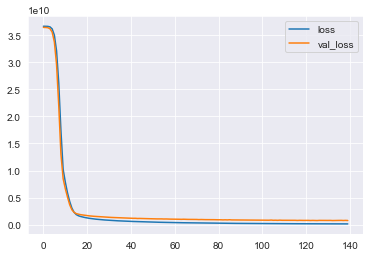

In [83]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [84]:
test_predictions = model.predict(x_test)

14/14 [==============================] - 0s 731us/step


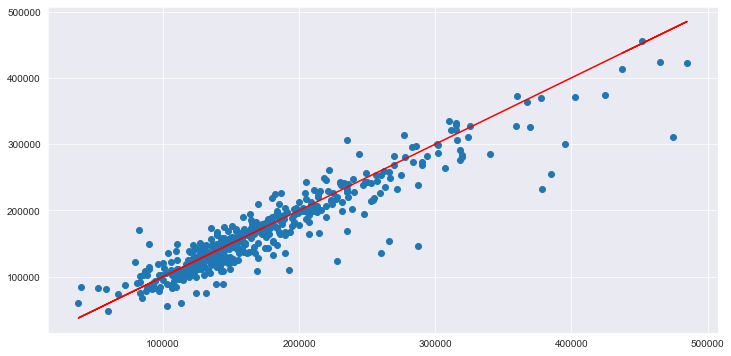

In [85]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,test_predictions)
plt.plot(y_test,y_test,'r')

In [86]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,test_predictions)

17951.612948228685

In [87]:
#creating new model with the optimum epochs
model = create_model()
optimal_epochs = losses.index.values[-1]

In [88]:
#full dataset, not the traintestsplit
X = scaler.fit_transform(X)

In [89]:
#refitting with the full dataset
model.fit(x=X,
          y=y,
          batch_size=64,
          epochs=optimal_epochs)

Epoch 1/139
23/23 [==============================] - 0s 2ms/step - loss: 36604674048.0000
Epoch 2/139
23/23 [==============================] - 0s 2ms/step - loss: 36566118400.0000
Epoch 3/139
23/23 [==============================] - 0s 2ms/step - loss: 36215824384.0000
Epoch 4/139
23/23 [==============================] - 0s 2ms/step - loss: 34407657472.0000
Epoch 5/139
23/23 [==============================] - 0s 2ms/step - loss: 27893884928.0000
Epoch 6/139
23/23 [==============================] - 0s 2ms/step - loss: 15332531200.0000
Epoch 7/139
23/23 [==============================] - 0s 2ms/step - loss: 6725720576.0000
Epoch 8/139
23/23 [==============================] - 0s 2ms/step - loss: 3907433984.0000
Epoch 9/139
23/23 [==============================] - 0s 2ms/step - loss: 2391301376.0000
Epoch 10/139
23/23 [==============================] - 0s 2ms/step - loss: 1875751808.0000
Epoch 11/139
23/23 [==============================] - 0s 2ms/step - loss: 1636189056.0000
Epoch 12/139


23/23 [==============================] - 0s 2ms/step - loss: 152395088.0000
Epoch 93/139
23/23 [==============================] - 0s 2ms/step - loss: 151435360.0000
Epoch 94/139
23/23 [==============================] - 0s 2ms/step - loss: 147704608.0000
Epoch 95/139
23/23 [==============================] - 0s 2ms/step - loss: 144326848.0000
Epoch 96/139
23/23 [==============================] - 0s 2ms/step - loss: 143387600.0000
Epoch 97/139
23/23 [==============================] - 0s 2ms/step - loss: 143476688.0000
Epoch 98/139
23/23 [==============================] - 0s 2ms/step - loss: 141685184.0000
Epoch 99/139
23/23 [==============================] - 0s 2ms/step - loss: 142287984.0000
Epoch 100/139
23/23 [==============================] - 0s 2ms/step - loss: 139609440.0000
Epoch 101/139
23/23 [==============================] - 0s 2ms/step - loss: 136974400.0000
Epoch 102/139
23/23 [==============================] - 0s 2ms/step - loss: 135436288.0000
Epoch 103/139
23/23 [==========

In [90]:
#Part 8
#Making predictions on our test set

In [91]:
#test house
ids = test['Id']
test = test.drop('Id',axis=1)

single_house = test.iloc[6]
single_house = scaler.transform(single_house.values.reshape(-1,input_layer_size))
model.predict(single_house)

1/1 [==============================] - 0s 37ms/step


array([[172511.02]], dtype=float32)

In [92]:
scaled_test = scaler.transform(test) #do not fit test data to avoid data leakage
final_preds = model.predict(np.array(scaled_test))

46/46 [==============================] - 0s 656us/step


A:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [93]:
def get_results(preds):
    return pd.DataFrame({'Id':ids,'SalePrice':preds.flatten()})

In [94]:
submission_df = get_results(final_preds)

In [95]:
submission_df.to_csv("predictions.csv",index=False)

In [96]:
#end of notebook
#Due to the small size of the training data (around 1500 datapoints),
#a deep neural network may not have been the best choice.